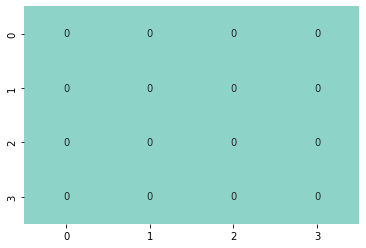

没有冲突


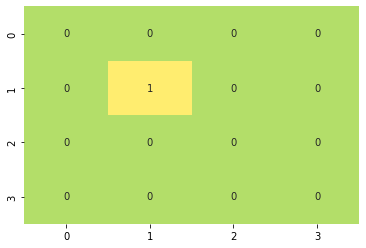

In [1]:
# N皇后
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams['figure.dpi']=50
plt.rcParams['font.size']=20

class Thing:
    def __init__(self, name=''):
        self.name = name
    def __repr__(self):
        return self.name

class Problem(Thing):
    def __init__(self, name):
        super().__init__(name)

class GameProblem(Problem):
    def __init__(self, name):
        super().__init__(name)
    def check_win(self):
        pass

class NQueen(GameProblem):
    def __init__(self, name, n):
        super().__init__(name)
        self.n = n
        self.map = np.zeros((n,n))
        # self.map = np.random.randint(0,10, (3,3))
    def check_45(self,state_map):
        if state_map is None:
            state_map = self.map
        n = self.n
        result_list = []
        for y in range(n-1):
            x = n-1
            l = 0
            while x>=0 and y<n:
                l += state_map[x,y]
                x-=1
                y+=1
            result_list.append(l)
        for x in range(1,n-1):
            y = 0
            l = 0
            while x>=0 and y<n:
                l += state_map[x,y]
                x-=1
                y+=1
            result_list.append(l)
        for y in range(n-1):
            x =0
            l = 0
            while y<n:
                l += state_map[x,y]
                x+=1
                y+=1
            result_list.append(l)
        for x in range(1,n-1):
            y =0
            l = 0
            while x<n:
                l += state_map[x,y]
                x+=1
                y+=1
            result_list.append(l)
        return result_list
    def check_win(self, state_map=None):
        if state_map is None:
            state_map = self.map
        check_map = np.concatenate([state_map.sum(axis=0),
                        state_map.sum(axis=1),
                        np.array(self.check_45(state_map))])
        # print(check_map)
        # print(np.where(check_map>1)[0])
        confict_num = len(np.where(check_map>1)[0])
        return confict_num ==0
    def pick(self, x,y):
        self.map[x,y]=1
        if self.check_win():
            print("没有冲突")
        else:
            print("有冲突")
        self.draw()
    def draw(self, title=""):
        sns.heatmap(self.map.clip(0,2),
                    cmap='Set3',
                    center = 0,
                    annot=True,
                    cbar = False
                    )
        plt.title(title)
        plt.show()

game = NQueen('queen', 4)
game.draw()
game.pick(1,1)

In [2]:
# 遗传算法
class GAPickNQueen(NQueen):
    def __init__(self, name, n):
        super().__init__(name, n)
    def cal_conflict(self, pick_list):
        n = self.n
        for row in pick_list:
            state_map = np.zeros((n,n))
            for x,y in zip(range(n), row):
                state_map[x,y] = 1
            check_map = np.concatenate([state_map.sum(axis=0),
                                        state_map.sum(axis=1),
                                        np.array(self.check_45(state_map))])
            conflict_num = (check_map[np.where(check_map>1)[0]]-1).sum()
            row[n] = conflict_num
    def auto_pick(self):
        n = self.n
        # 初始种群
        init_nodes_num = 10 # 种群规模
        pick_list = np.random.randint(0,n,(init_nodes_num,n+1))# 最后一列是得分
        self.cal_conflict(pick_list)
        # print(pick_list)
        pick_time=0
        total_time= 10000
        while pick_time<total_time:
            pick_time+=1
            # 配对
            np.random.shuffle(pick_list)
            for row1, row2 in zip(pick_list[:int(len(pick_list)/2)],pick_list[int(len(pick_list)/2):]):
                # 杂交
                k = np.random.randint(1,7)
                row_swap = row1[:k]
                row1[:k] = row2[:k]
                row2[:k] = row_swap
                # 变异
                # print(row1)
                # print(row2)
                k = np.random.randint(0,n)
                row1[k] = np.random.randint(0,n)
                row2[k] = np.random.randint(0,n)
            # 计算适应性
            self.cal_conflict(pick_list)
            # 按照适应性排序，删除最弱20%的种群
            delete_size = int(len(pick_list)*0.2)
            pick_list = pick_list[np.lexsort((pick_list[:,-1],))][:len(pick_list)-delete_size]
            # 补充新种群
            new_blood = np.random.randint(0,n,(delete_size,n+1))
            pick_list = np.concatenate((pick_list,new_blood),axis=0)
            # print(pick_list)
            if pick_time % (total_time/10) ==0:
                print(pick_time)
                # 显示最好的结果
                for x,y in zip(range(n), pick_list[0]):
                    self.map[x,y] = 1
                self.draw(pick_list[0])
                self.map-=self.map
            if pick_list[0][n] == 0:
                print("已找到最优解")
                # 显示最好的结果
                for x,y in zip(range(n), pick_list[0]):
                    self.map[x,y] = 1
                self.draw(pick_list[0])
                self.map-=self.map
                break
game = GAPickNQueen('ga_queen', 8)
game.auto_pick()

第3000次选点：[6 3 0 6 2 2 5 1 5 7 7 7 7 6 3 4]
第6000次选点：[3 2 1 1 4 5 0 0 7 5 3 3 0 6 4 7]
第9000次选点：[4 6 6 7 5 7 0 1 6 6 7 7 2 3 1 0]
第12000次选点：[4 6 2 1 1 0 0 5 6 0 7 0 7 1 2 3]
第15000次选点：[6 6 6 2 4 2 4 5 5 1 4 6 6 1 2 0]
第18000次选点：[3 0 1 5 6 1 7 3 2 2 4 5 1 6 4 4]
第21000次选点：[5 5 0 1 4 2 5 1 5 6 2 7 7 6 0 7]
第24000次选点：[0 6 6 7 0 3 6 1 6 2 3 2 3 3 5 7]
第27000次选点：[2 0 1 3 3 3 5 0 5 1 4 6 6 1 6 2]
第30000次选点：[4 5 7 4 4 6 3 6 1 1 3 7 6 0 4 4]
